### Task 4
# EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [66]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:

# Load the dataset
df = pd.read_csv("/home/vs/Downloads/spam (1).csv", encoding='latin-1')

# Display the dataset
df

# Check information about the dataset
df.info()

# Drop unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# Rename columns for better readability
new_column_names = {"v1": "Category", "v2": "Message"}
df.rename(columns=new_column_names, inplace=True)

# Handle missing values
data = df.where((pd.notnull(df)), ' ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [68]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [69]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [71]:
data.shape

(5572, 2)

In [72]:
# Encode 'spam' as 0 and 'ham' as 1 in the 'Category' column

data.loc[data["Category"] == "spam", "Category"] = 0
data.loc[data["Category"] == "ham", "Category"] = 1

# Split the dataset into features (X) and target (Y)

X = data["Message"]
Y = data["Category"]
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [73]:
# Split the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [74]:
# Display shapes of data splits

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)


(5572,)
(4457,)
(1115,)
(5572,)
(4457,)
(1115,)


In [75]:
# Create TF-IDF vectorizer for text feature extraction

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [76]:
# Convert target variables to integers

Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [77]:
# Create a Logistic Regression model and fit it to the training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [78]:
# Predict on the training data and calculate accuracy

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Accuracy on training data:", accuracy_on_training_data)


Accuracy on training data: 0.9661207089970832


In [79]:
# Define a sample email and predict its category (spam/ham)

input_your_mail = ["Congratulations! You have won a free vacation to an exotic destination. Click the link to claim your prize now!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)

[0]


In [80]:
# Interpret the prediction result

if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")



Spam Mail


In [81]:
# Define another sample email and predict its category

input_your_mail = ["Meeting reminder: Tomorrow, 10 AM, conference room. See you there!"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


[1]


In [82]:
# Interpret the prediction result

if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


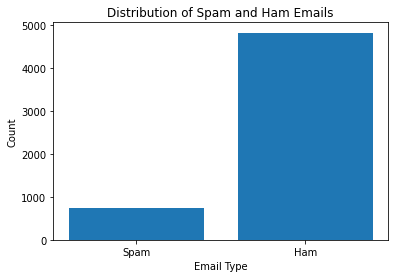

In [83]:
# Count and visualize the distribution of spam and ham emails

spam_count = data[data['Category'] == 0].shape[0]
ham_count = data[data['Category'] == 1].shape[0]
plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

In [84]:
# Create a confusion matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

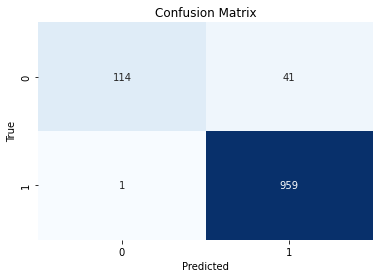

In [85]:
# Visualize the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


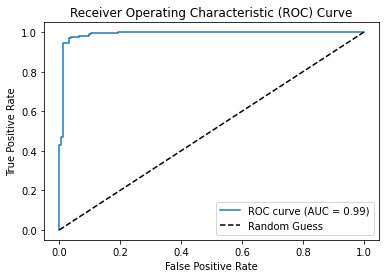

In [86]:
# Calculate and plot the ROC curve and AUC score

probabilities = model.predict_proba(X_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
roc_auc = roc_auc_score(Y_test, probabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


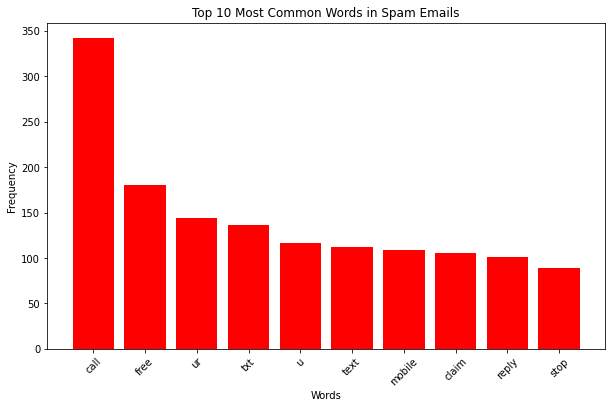

In [87]:
# Count and visualize the most common words in spam emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(data[data['Category'] == 0]['Message']).split()
ham_words = " ".join(data[data['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()


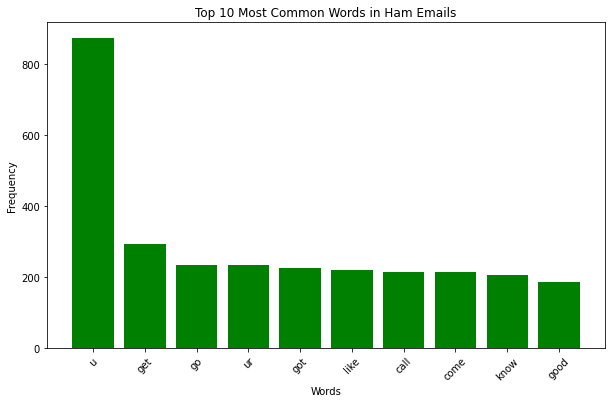

In [88]:
# Count and visualize the most common words in ham emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])
plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()